In [ ]:
#Data Manipulation and Analysis
import pandas as pd  # For handling and analyzing structured data
import numpy as np   # For numerical operations and working with arrays

#Data Visualization
import matplotlib.pyplot as plt  # For creating static visualizations (plots, charts)
import seaborn as sns            # For advanced data visualization based on matplotlib
import plotly.express as px      # For interactive visualizations

# Text Processing and Cleaning
import re                        # For regular expressions to clean and manipulate text
import nltk                      # Natural Language Toolkit for text processing tasks
from nltk.corpus import stopwords           # To remove common stop words from text
from nltk.stem.porter import PorterStemmer  # For stemming words to their root form

# Machine Learning and Model Building
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text to numerical features using TF-IDF
from sklearn.model_selection import train_test_split        # To split data into training and testing sets
from sklearn.linear_model import LogisticRegression         # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier         # Random Forest classifier
from xgboost import XGBClassifier                           # XGBoost classifier for gradient boosting

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluating model performance

#Label Encoding
from sklearn.preprocessing import LabelEncoder  # To convert categorical labels to numerical format

#Model Persistence
import pickle                   # For saving (serializing) and loading (deserializing) machine learning models

#Text Visualization
from wordcloud import WordCloud  # To generate word clouds for visualizing the most frequent words in the text


In [ ]:
# Defining column names
columns = ['id', 'country', 'Target', 'Tweet']

# Reading the CSV file into a DataFrame
df = pd.read_csv("dataset/twitter_training.csv", names=columns)

In [ ]:
print(df.shape)  # Prints the number of rows and columns in the DataFrame

(74682, 4)


In [ ]:
# Display the first 5 rows of the dataset to get an overview of the data
df.head(5)

,id,country,Target,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Display summary information about the dataset, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   Target   74682 non-null  object
 3   Tweet    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Check for missing (null) values in each column and display the total count of nulls per column
df.isnull().sum()

,0
id,0
country,0
Target,0
Tweet,686


In [7]:
# Drop rows with null values in the 'text' column
df= df.dropna(subset=['Tweet'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the updated DataFrame and the new shape
print(df.head())
print(f"Shape of data after dropping null values: {df.shape}")

     id      country    Target  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Shape of data after dropping null values: (73996, 4)


In [ ]:
# Count the number of occurrences of each unique value in the 'Target' column
df['Target'].value_counts()

,count
Target,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [9]:
# Count the occurrences of each sentiment category
sentiment_counts = df["Target"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]

# Create a bar plot using Plotly
fig = px.bar(sentiment_counts, x="Sentiment", y="Count", color="Sentiment",
             color_discrete_map={"Positive": "green", "Negative": "red", "Irrelevant": "gray"},
             title="Count of Positive, Negative, Neutral and Irrelevant Tweets")

# Show the plot
fig.show()

In [10]:
# Convert text column to string and handle NaN values
df["Tweet"] = df["Tweet"].astype(str)

# Calculate tweet length
df["Length"] = df["Tweet"].apply(len)

# Calculate average tweet length per sentiment
avg_length_by_sentiment = df.groupby('Target')['Length'].mean().reset_index()

# Create a bar chart to show average tweet length by sentiment
fig = px.bar(avg_length_by_sentiment,
             x="Target",
             y="Length",
             color="Target",
             color_discrete_map={"Positive": "green", "Negative": "red", "Irrelevant": "gray", "Neutral": "blue"},
             title="Average Tweet Length by Sentiment",
             labels={"target": "Sentiment", "Length": "Average Tweet Length"})

# Show the plot
fig.show()

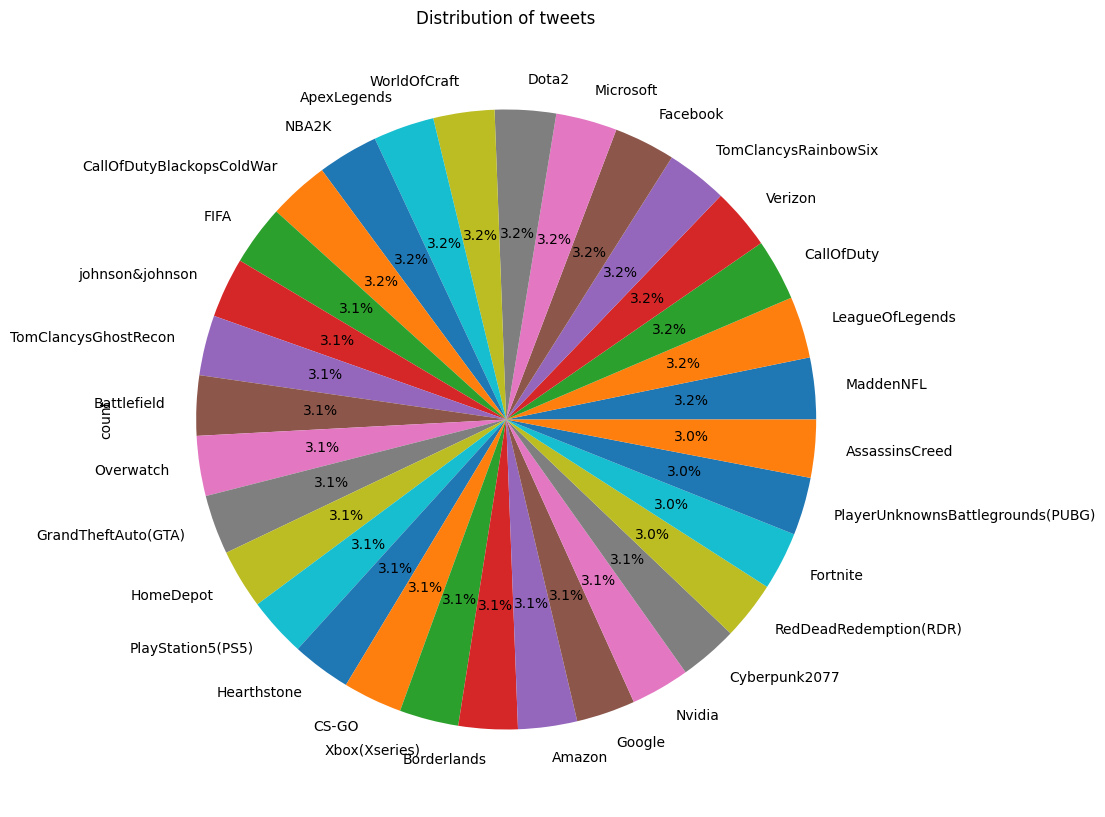

In [ ]:
# Count the occurrences of each country in the 'country' column
entity_content = df['country'].value_counts()

# Plot a pie chart to visualize the distribution of tweets by country
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))

# Add a title to the pie chart
plt.title('Distribution of Tweets')

# Display the pie chart
plt.show()


<Axes: xlabel='Target'>

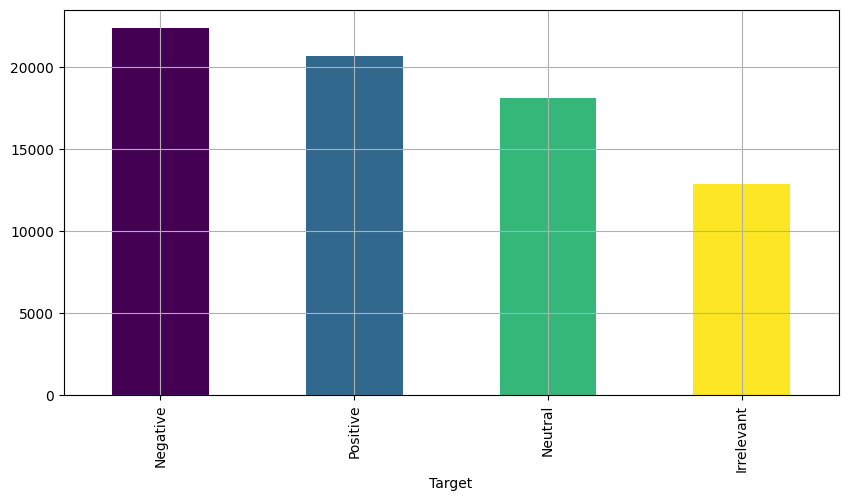

In [ ]:
# Count the occurrences of each sentiment in the 'Target' column
sentiment_content = df['Target'].value_counts()

# Generate a color palette using the 'viridis' colormap
color = plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]

# Extract sentiment labels (x-axis) and their corresponding counts (y-axis)
x = sentiment_content.index
y = sentiment_content.values

# Set the figure size for better visualization
plt.figure(figsize=(10, 5))

# Plot a bar chart to visualize the distribution of sentiments
sentiment_content.plot(kind='bar', color=colors, grid=True)

# Add labels and title for better understanding
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Display the bar chart
plt.show()

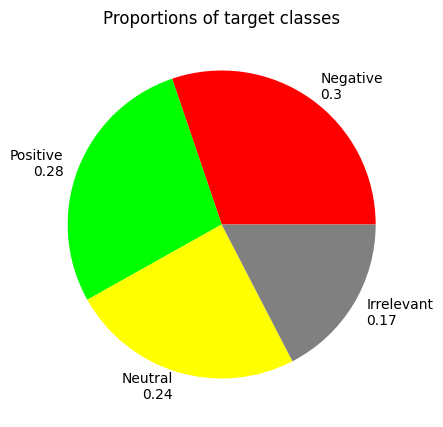

In [ ]:
# Count the occurrences of each sentiment in the 'Target' column
target_balance = df['Target'].value_counts()

# Set the figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot a pie chart to show the proportion of each sentiment class
plt.pie(
    target_balance, 
    labels=[f'{idx}\n{round(target_balance[idx]/len(df), 2)}' for idx in target_balance.index],  # Add labels with class name and proportion
    colors=['r', '#00FF00', '#FFFF00', 'gray']  # Set custom colors for each class
)

# Add a title to the pie chart
plt.title('Proportions of Target Classes')

# Display the pie chart
plt.show()

In [14]:
# Download the stopwords resource
nltk.download('stopwords')

# Get the list of stopwords for English
stop_words = stopwords.words('english')

# Print the list of stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:

port_stem = PorterStemmer()
# Function to clean and stem text
def clean_text(text):
    if isinstance(text, float):  # Check if the text is NaN (float)
        text = " "  # Assign a space if NaN

    # Clean the text by removing non-alphabetical characters and converting to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Split the text into words
    words = text.split()

    # Remove stopwords and apply stemming
    words = [port_stem.stem(word) for word in words if word not in stop_words]

    # Join the words back into a string with spaces
    cleaned_text = ' '.join(words)

    return cleaned_text

# Example usage with a DataFrame (assuming df is your DataFrame with a 'Tweet' column)
df['Filter_Tweet'] = df['Tweet'].apply(clean_text)

In [17]:
#Splitting the data
X = df['Filter_Tweet'].values
Y = df['Target'].values
print(X)
print(Y)

['im get borderland murder' 'come border kill' 'im get borderland kill'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [ ]:
# Split the dataset into training and testing sets
# X: Features, Y: Target labels
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=2 ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the original dataset, training set, and testing set
# This helps verify the data has been split correctly
print(X.shape, X_train.shape, X_test.shape)

# Print the testing set to view the data that will be used for evaluation
print(X_test)

(73996,) (59196,) (14800,)
['assassin creed odyssey probabl favorit seri'
 'need speed verizon ericsson qualcomm achiev blister speed gbp connect fast would let us downlo lnkd gdea ya lnkd gpuiydv'
 'deserv worst vision storm' ...
 'find asbesto lab babi powder link cancer oh fuck shit'
 'oklahoma judg order taylor johnson usa pay million opioid vaccin isreali segment gigant pharmosed one born memori hospit get hiv cure aid see ad npr org'
 'improv valuabl hehe p sorri poop qualiti nvidia clip pic facebook com oy smnxfuo']


Epoch 1/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 227s 267ms/step - accuracy: 0.4995 - loss: 1.1369 - val_accuracy: 0.6782 - val_loss: 0.8151
Epoch 2/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 220s 264ms/step - accuracy: 0.7137 - loss: 0.7280 - val_accuracy: 0.7154 - val_loss: 0.7198
Epoch 3/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 224s 269ms/step - accuracy: 0.7646 - loss: 0.6032 - val_accuracy: 0.7378 - val_loss: 0.6655
Epoch 4/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 260s 266ms/step - accuracy: 0.8055 - loss: 0.5087 - val_accuracy: 0.7611 - val_loss: 0.6254
Epoch 5/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 259s 262ms/step - accuracy: 0.8254 - loss: 0.4522 - val_accuracy: 0.7716 - val_loss: 0.6116
Epoch 6/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 225s 270ms/step - accuracy: 0.8425 - loss: 0.4081 - val_accuracy: 0.7828 - val_loss: 0.5996
Epoch 7/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 225s 271ms/step - accuracy: 0.8564 - loss: 0.3720 - val_accuracy: 0.7873 - val_loss: 0.5866
Epoch 8/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 256s 264ms/step - accuracy: 0.8670 -

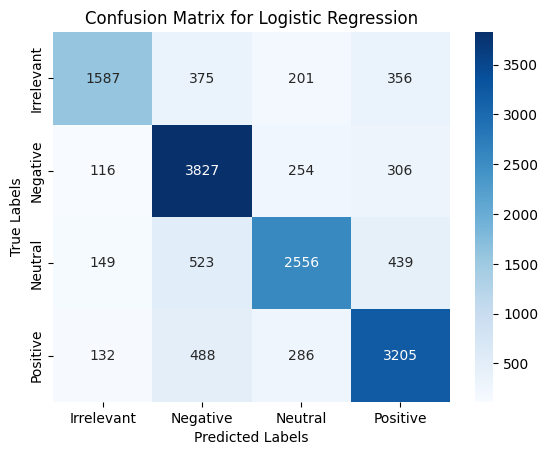

Random Forest Results:
Accuracy: 0.9184, Precision: 0.9205, Recall: 0.9184, F1-Score: 0.9186

Classification Report for Random Forest:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.87      0.91      2519
    Negative       0.93      0.94      0.93      4503
     Neutral       0.94      0.90      0.92      3667
    Positive       0.87      0.94      0.90      4111

    accuracy                           0.92     14800
   macro avg       0.92      0.91      0.92     14800
weighted avg       0.92      0.92      0.92     14800



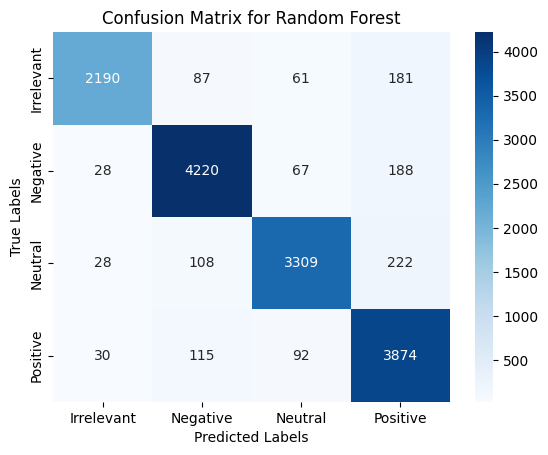

XGBoost Results:
Accuracy: 0.6505, Precision: 0.6699, Recall: 0.6505, F1-Score: 0.6412

Classification Report for XGBoost:
              precision    recall  f1-score   support

  Irrelevant       0.75      0.39      0.51      2519
    Negative       0.59      0.85      0.70      4503
     Neutral       0.71      0.56      0.63      3667
    Positive       0.66      0.67      0.67      4111

    accuracy                           0.65     14800
   macro avg       0.68      0.62      0.63     14800
weighted avg       0.67      0.65      0.64     14800



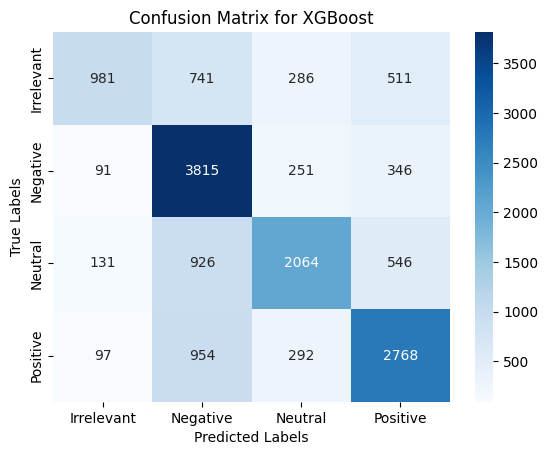

463/463 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step
LSTM Results:
Accuracy: 0.8661, Precision: 0.8673, Recall: 0.8661, F1-Score: 0.8661

Classification Report for LSTM:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.83      0.84      2519
    Negative       0.89      0.90      0.89      4503
     Neutral       0.90      0.84      0.87      3667
    Positive       0.82      0.88      0.85      4111

    accuracy                           0.87     14800
   macro avg       0.87      0.86      0.86     14800
weighted avg       0.87      0.87      0.87     14800



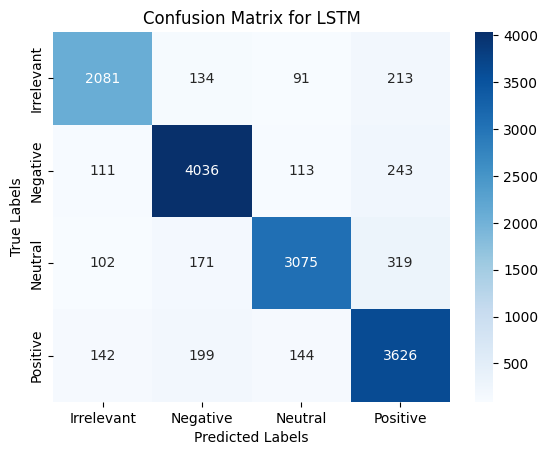

The Best Model is: Random Forest with F1-Score: 0.9186


<ipython-input-21-c68eeaa46fe6>:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c68eeaa46fe6>:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c68eeaa46fe6>:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-c68eeaa46fe6>:109: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




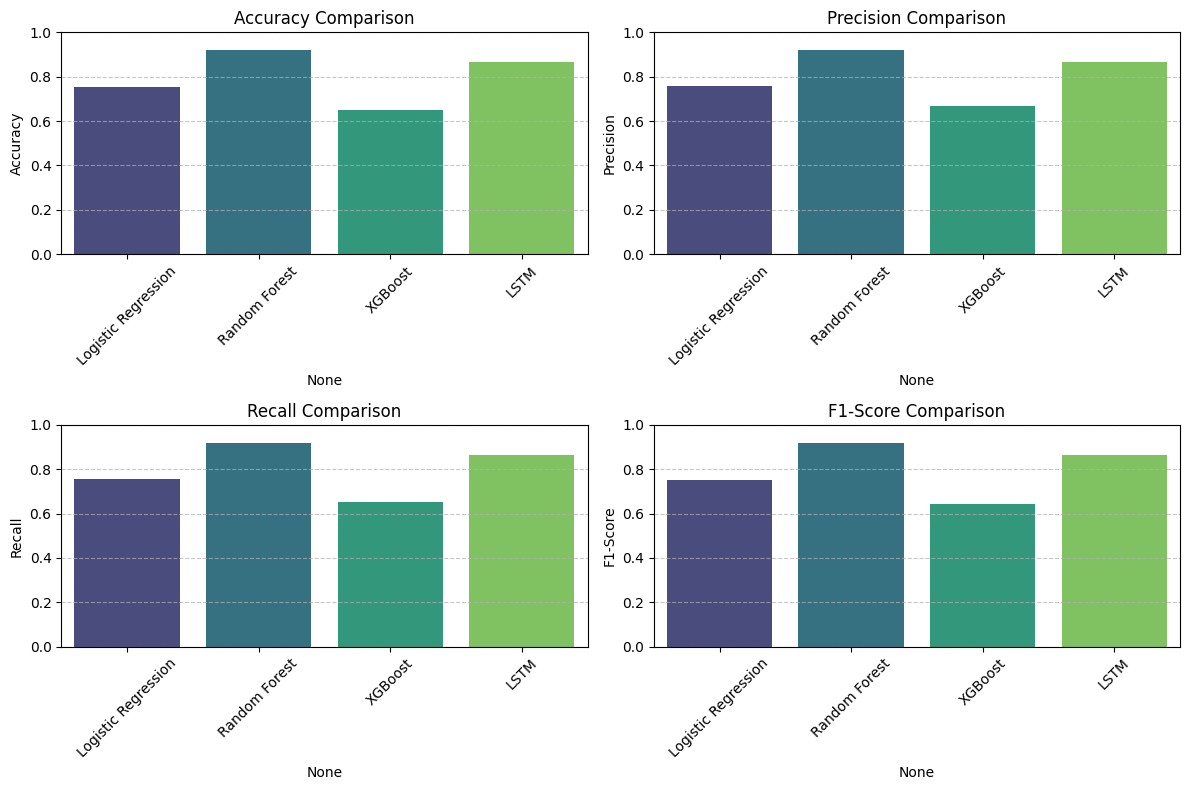

Best Model Saved: Random Forest


In [21]:
import pickle
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

# Assuming X_train, Y_train, X_test, Y_test are already defined

# Label Encoding
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Number of classes
NUM_CLASSES = len(label_encoder.classes_)

# Vectorization for Traditional Models
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
log_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
log_model.fit(X_train_vec, Y_train_encoded)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, Y_train_encoded)

# XGBoost Model
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train_vec, Y_train_encoded)

# LSTM Model
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(NUM_CLASSES, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_seq, Y_train_encoded, epochs=50, batch_size=64, validation_split=0.1)

# Evaluation Function
def evaluate_model(model, X_test, Y_test_encoded, model_type='traditional'):
    if model_type == 'lstm':
        Y_pred = model.predict(X_test).argmax(axis=1)
    else:
        Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test_encoded, Y_pred)
    precision = precision_score(Y_test_encoded, Y_pred, average='weighted')
    recall = recall_score(Y_test_encoded, Y_pred, average='weighted')
    f1 = f1_score(Y_test_encoded, Y_pred, average='weighted')
    report = classification_report(Y_test_encoded, Y_pred, target_names=label_encoder.classes_)
    cm = confusion_matrix(Y_test_encoded, Y_pred)

    return accuracy, precision, recall, f1, report, cm

# Evaluate All Models
models = {
    'Logistic Regression': (log_model, X_test_vec, 'traditional'),
    'Random Forest': (rf_model, X_test_vec, 'traditional'),
    'XGBoost': (xgb_model, X_test_vec, 'traditional'),
    'LSTM': (lstm_model, X_test_seq, 'lstm')
}

results = {}
for name, (model, X, m_type) in models.items():
    accuracy, precision, recall, f1, report, cm = evaluate_model(model, X, Y_test_encoded, model_type=m_type)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    print(f"{name} Results:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")
    print(f"Classification Report for {name}:\n{report}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Identify and Print Best Model
best_model_name = max(results, key=lambda x: results[x]['F1-Score'])
print(f"The Best Model is: {best_model_name} with F1-Score: {results[best_model_name]['F1-Score']:.4f}")

# Plotting
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results).T

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Save the Best Model Based on F1-Score
best_model, best_X, best_type = models[best_model_name]

if best_type == 'traditional':
    pickle.dump(best_model, open('sentiment_model.sav', 'wb'))
    pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
elif best_type == 'lstm':
    best_model.save('sentiment_model.h5')

# Save Label Encoder
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))

print(f"Best Model Saved: {best_model_name}")
